In [1]:
#!pip install nsepy


In [2]:
import pandas as pd

In [3]:
from univariate import univariate

In [4]:
Obj=univariate()

In [5]:
#!pip install yfinance
from nsepy import get_history
import datetime as dt
import yfinance as yf

# Define the start and end dates
start = dt.datetime(2021, 6, 1)
end = dt.datetime(2022, 1, 5)
symbol='AXISBANK.NS'

stk_data=yf.download(symbol, start=start, end=end)
stk_data


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-01,753.549988,754.000000,741.150024,745.150024,741.917419,6660243
2021-06-02,744.799988,745.299988,734.200012,737.000000,733.802734,9973043
2021-06-03,743.000000,752.250000,739.000000,750.650024,747.393616,8170508
2021-06-04,751.000000,759.900024,740.099976,742.049988,738.830872,10336011
2021-06-07,743.099976,753.950012,741.500000,751.099976,747.841553,6986728
...,...,...,...,...,...,...
2021-12-29,674.500000,679.599976,667.250000,670.500000,667.591248,3969894
2021-12-30,668.000000,673.099976,664.500000,668.849976,665.948425,5119705
2021-12-31,672.950012,686.500000,671.200012,678.549988,675.606323,5586980


In [6]:
stk_data=stk_data[['Open','High','Low','Close']]
stk_data

,Open,High,Low,Close
Date,,,,
2021-06-01,753.549988,754.000000,741.150024,745.150024
2021-06-02,744.799988,745.299988,734.200012,737.000000
2021-06-03,743.000000,752.250000,739.000000,750.650024
2021-06-04,751.000000,759.900024,740.099976,742.049988
2021-06-07,743.099976,753.950012,741.500000,751.099976
...,...,...,...,...
2021-12-29,674.500000,679.599976,667.250000,670.500000
2021-12-30,668.000000,673.099976,664.500000,668.849976
2021-12-31,672.950012,686.500000,671.200012,678.549988


In [7]:
column='Close'

In [8]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
data1=ms.fit_transform(stk_data[[column]])
print('len:',data1.shape)

len: (150, 1)


In [9]:
len(data1)

150

In [10]:
training_size = round(len(data1 ) * 0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size: ]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size: ]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

120
X_train length: (120, 1)
X_test length: (30, 1)
y_train length: (120, 1)
y_test length: (30, 1)


In [11]:
from sklearn.metrics import mean_squared_error

lags=[1,2,3,4]
trends=['n','t','c','ct']
from statsmodels.tsa.ar_model import AutoReg
for i in lags:
#print(i)

    for td in trends:
    
        #print(td)
        #trendslist.append(td)
        model = AutoReg(X_train, lags=i,trend=td)
        model_fit = model.fit()
        # make prediction
        y_pred= model_fit.predict(len(X_train), len(data1)-1)
        #print(y_pred)
        #mse=mean_squared_error(y_test,y_pred,squared=False)
        from stockFunctions import rmsemape
        print('Lag={},Trend={}'.format(i,td))
        rmsemape(y_test,y_pred)
        print('*********')

Lag=1,Trend=n
RMSE-Testset: 0.08745948767721823
maPe-Testset: 25989777444545.574
*********
Lag=1,Trend=t
RMSE-Testset: 0.3141377508980852
maPe-Testset: 17589164887583.164
*********
Lag=1,Trend=c
RMSE-Testset: 0.2129949844829164
maPe-Testset: 35886407714783.43
*********
Lag=1,Trend=ct
RMSE-Testset: 0.08872506510128948
maPe-Testset: 27757453315533.465
*********
Lag=2,Trend=n
RMSE-Testset: 0.0881003784786237
maPe-Testset: 25720868639164.863
*********
Lag=2,Trend=t
RMSE-Testset: 0.19126124031819475
maPe-Testset: 21183379633872.67
*********
Lag=2,Trend=c
RMSE-Testset: 0.31059203605217545
maPe-Testset: 45236919809470.234
*********
Lag=2,Trend=ct
RMSE-Testset: 0.23697921146918882
maPe-Testset: 40016013136375.74
*********
Lag=3,Trend=n
RMSE-Testset: 0.08885048244963126
maPe-Testset: 27532077278316.504
*********
Lag=3,Trend=t
RMSE-Testset: 0.18758635370550214
maPe-Testset: 22735029957349.992
*********
Lag=3,Trend=c
RMSE-Testset: 0.2824395970186907
maPe-Testset: 43014730017664.32
*********
Lag=3

C:\Users\saran\anaconda3\envs\aimachine\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\saran\anaconda3\envs\aimachine\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\saran\anaconda3\envs\aimachine\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\saran\anaconda3\envs\aimachine\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be remove

In [12]:
i=1 
td="ct"
model = AutoReg(X_train, lags=i,trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred, squared=False)
from stockFunctions import rmsemape
print("Lag={},Trend={}".format(i,td))
rmsemape(y_test,y_pred)
print('*************')

Lag=1,Trend=ct
RMSE-Testset: 0.08872506510128948
maPe-Testset: 27757453315533.465
*************


C:\Users\saran\anaconda3\envs\aimachine\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\saran\anaconda3\envs\aimachine\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


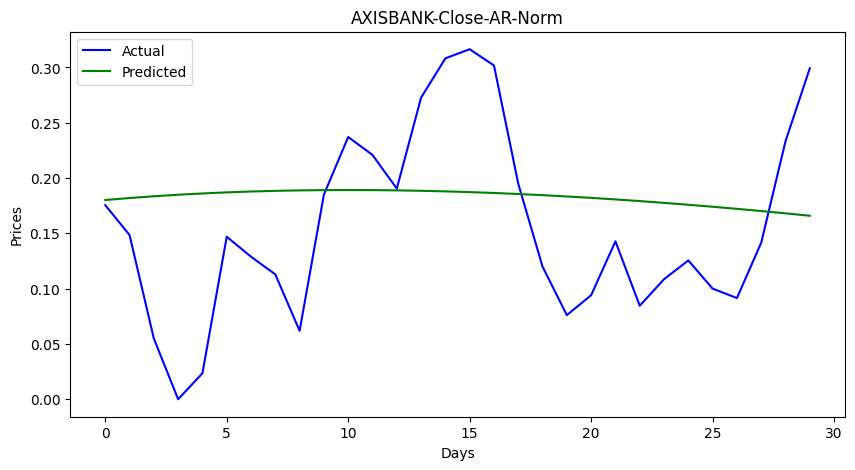

In [13]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","AXISBANK-Close-AR-Norm","Days","Prices")

In [14]:
len(data1)

150

In [15]:
y_test

array([[0.17551572],
       [0.14845386],
       [0.05489703],
       [0.        ],
       [0.02345386],
       [0.14690722],
       [0.12886598],
       [0.11288672],
       [0.06185567],
       [0.18505167],
       [0.2371134 ],
       [0.22087648],
       [0.19046398],
       [0.27268054],
       [0.30824767],
       [0.31649497],
       [0.30180438],
       [0.19484561],
       [0.11984536],
       [0.07603093],
       [0.09407216],
       [0.14278357],
       [0.08453621],
       [0.10850541],
       [0.12551565],
       [0.10000013],
       [0.09149485],
       [0.14149491],
       [0.23324742],
       [0.29922706]])

In [16]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])

In [17]:
aTestNormTable

,Close
0,0.175516
1,0.148454
2,0.054897
3,0.0
4,0.023454
5,0.146907
6,0.128866
7,0.112887
8,0.061856
9,0.185052


In [18]:
actual_stock_price_test_ori=ms.inverse_transform(aTestNormTable)
actual_stock_price_test_ori

array([[685.15002441],
       [679.90002441],
       [661.75      ],
       [651.09997559],
       [655.65002441],
       [679.59997559],
       [676.09997559],
       [673.        ],
       [663.09997559],
       [687.        ],
       [697.09997559],
       [693.95001221],
       [688.04998779],
       [704.        ],
       [710.90002441],
       [712.5       ],
       [709.65002441],
       [688.90002441],
       [674.34997559],
       [665.84997559],
       [669.34997559],
       [678.79998779],
       [667.5       ],
       [672.15002441],
       [675.45001221],
       [670.5       ],
       [668.84997559],
       [678.54998779],
       [696.34997559],
       [709.15002441]])

In [19]:
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])
actual_stock_price_test_oriA

,Close
0,685.150024
1,679.900024
2,661.75
3,651.099976
4,655.650024
5,679.599976
6,676.099976
7,673.0
8,663.099976
9,687.0


In [20]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [21]:
actual_stock_price_test_oriA

,Close
0,685.150024
1,679.900024
2,661.75
3,651.099976
4,655.650024
5,679.599976
6,676.099976
7,673.0
8,663.099976
9,687.0


In [22]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

In [30]:
predicted_stock_price_test_oriP

,Close
0,686.045213
1,686.39606
2,686.704127
3,686.970921
4,687.197896
5,687.386452
6,687.537944
7,687.653676
8,687.734908
9,687.782854


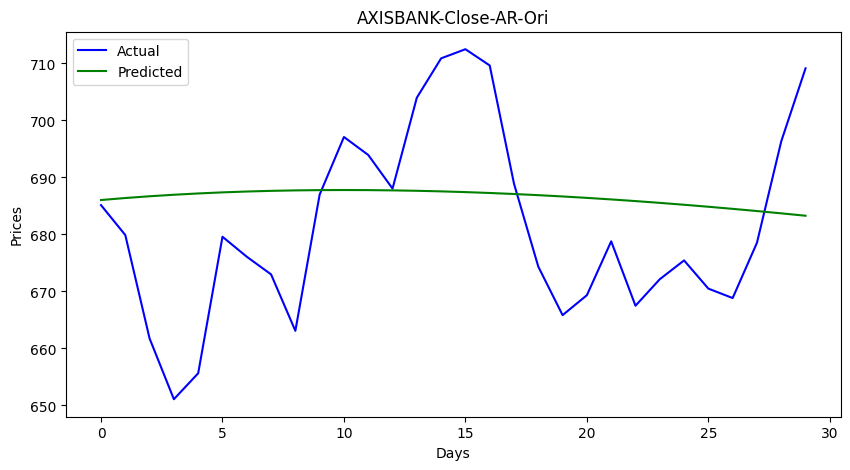

In [23]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","AXISBANK-Close-AR-Ori","Days","Prices")

In [24]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 17.212662629650136
maPe-Testset: 0.02146590863572901


C:\Users\saran\anaconda3\envs\aimachine\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [25]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [26]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [27]:
forecast_stock_price_test_oriF

,Closefore
0,682.855198
1,682.40562
2,681.941449
3,681.463197


In [28]:
forecast_stock_price_test_oriF.to_csv("CloseAR.csv",index=False)

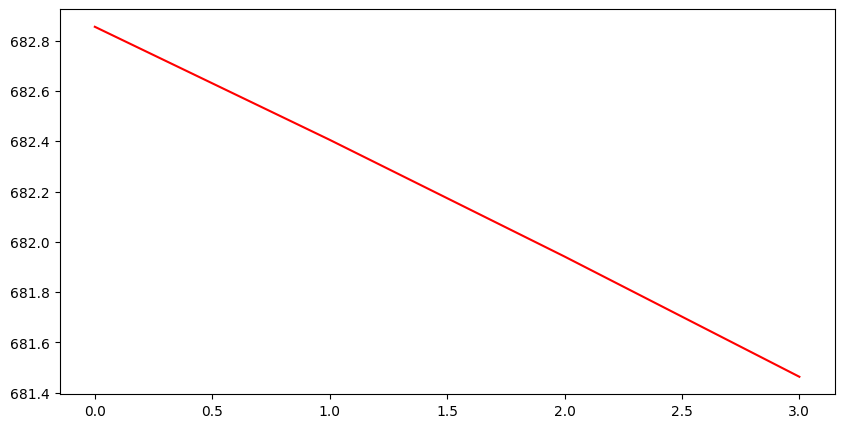

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[116:145], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")